In [1]:
# import packages
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
import warnings
from pandas.core.common import SettingWithCopyWarning

# Place of Death Analysis

In [2]:
# Read in Explicit Death Certificates
path = 'csv_data/co_deaths_1520ytd 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)

In [3]:
# Death by Place of Death until 36th week of the year (reliable data until then)
years = [2015, 2016, 2017, 2018, 2019, 2020]
POD = ['DOA', 'HOS', 'INP', 'NUR', 'OER', 'OTH', 'RES', 'UNK']
PODArr = np.zeros((len(years), len(POD)))
for i, year in enumerate(years):
    # First Case Time Frame
    raw2 = raw[raw.year == year]
    raw2['dwk'] = raw2['dwk'].astype(int)
    raw2 = raw2[raw2.dwk.isin(list(range(9, 37)))]
    # Deaths by place of death and year
    for j, place in enumerate(POD):
        raw3 = raw2[raw2.factype == place]
        PODArr [i][j] = raw3.shape[0]

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# Population in 2017 and 2014-2019
numCounty = 64
numYears = 6
path = 'csv_data/CountyRankings.xls'
popDf = pd.read_excel(path, index_col = None)
popDf = popDf.iloc[:, 6:12]
pop = popDf['July 2017'].values.astype(float) / 100000.
popArr = np.zeros((numYears, numCounty))
yearN = list(popDf.columns)
for i, year in enumerate(yearN):
    popArr[i, :] = popDf[year].values.astype(float)
popArr = popArr / 100000.
PODArrPop = (PODArr.T / np.sum(popArr, axis = 1)).T

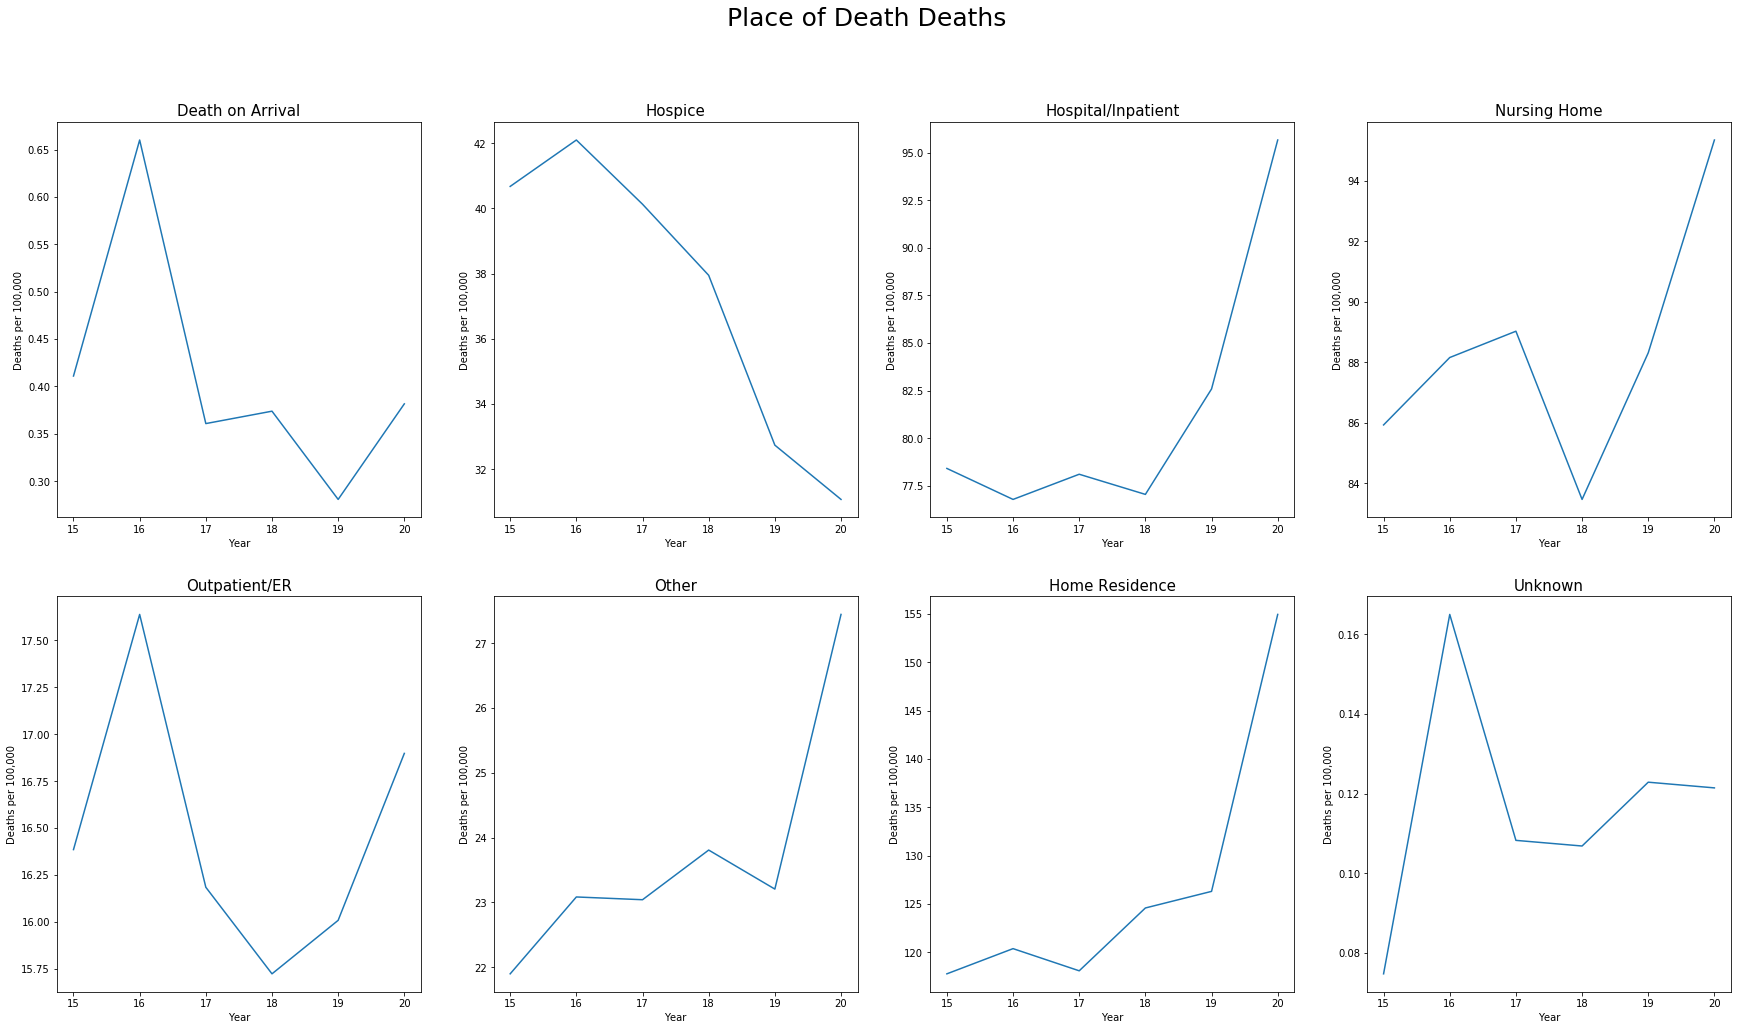

In [5]:
# Figure for Deaths by Place of Death from 2015 to 2020
years2 = ['15', '16', '17', '18', '19', '20']
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 16))
index = 0
# Place of Death Titles
titles = ["Death on Arrival", "Hospice", "Hospital/Inpatient", "Nursing Home", "Outpatient/ER", "Other", "Home Residence"
          , "Unknown"]
for row in ax:
    for col in row:
        col.plot(years2, PODArrPop[:, index])
        col.set_title(titles[index], fontsize = 15)
        col.set(xlabel="Year", ylabel='Deaths per 100,000')
        index += 1
fig.suptitle("Place of Death Deaths", fontsize = 25)
# Create the legend
plt.show(fig)

In [6]:
# Excess Deaths Calculations
excessDeathPOD = PODArr[-1, :] - np.mean(PODArr[0:len(PODArr) - 1, :], axis = 0)
excessDeathPODPop = excessDeathPOD/sum(pop)
dictexcessDeathPODPop = dict(zip(titles, excessDeathPODPop))
sorted_excessDeathPODPop = sorted(dictexcessDeathPODPop.items(), key=lambda kv: kv[1])
dict_sorted_excessDeathPODPop = dict() 
for key,value in sorted_excessDeathPODPop: 
    dict_sorted_excessDeathPODPop.setdefault(key, value)
sorted_excessDeathPODPop = dict_sorted_excessDeathPODPop.copy()
full_version = sorted_excessDeathPODPop.copy()

# Remove unwanted places of death
sorted_excessDeathPODPop.pop('Unknown')
sorted_excessDeathPODPop.pop('Death on Arrival');

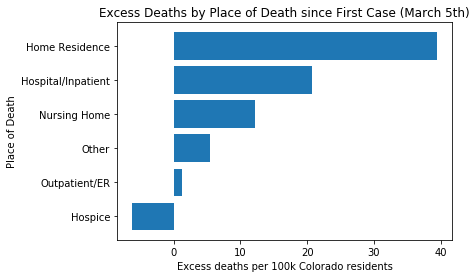

In [7]:
# Ranked Excess Deaths by Place of Death
y_pos = np.arange(len(sorted_excessDeathPODPop))
plt.barh(y_pos, list(sorted_excessDeathPODPop.values()), align='center')
plt.yticks(y_pos, list(sorted_excessDeathPODPop.keys()))
plt.xlabel('Excess deaths per 100k Colorado residents')
plt.ylabel('Place of Death')
plt.title('Excess Deaths by Place of Death since First Case (March 5th)')
plt.show()

In [8]:
# Ratio of Deaths in 2020 to 2015-2019 by Place of Death
multiplierPlace = PODArr.T[:, 5]/np.mean(PODArr.T[:, 0:5], axis = 1)
dict_multiplier = dict()
for i, mult in enumerate(multiplierPlace):
    dict_multiplier[titles[i]] = mult
sorted_multiplier = sorted(dict_multiplier.items(), key=lambda kv: kv[1])
dict_sorted_multiplier = dict() 
for key,value in sorted_multiplier: 
    dict_sorted_multiplier.setdefault(key, value)
sorted_multiplier = dict_sorted_multiplier.copy()
full_version_mult = sorted_excessDeathPODPop.copy()
sorted_multiplier.pop('Unknown')
sorted_multiplier.pop('Death on Arrival');

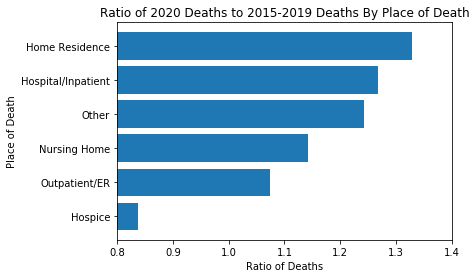

In [9]:
# Plot of ratios
y_pos = np.arange(len(sorted_multiplier))
plt.barh(y_pos, list(sorted_multiplier.values()), align='center')
plt.yticks(y_pos, list(sorted_multiplier.keys()))
plt.xlabel('Ratio of Deaths')
plt.ylabel('Place of Death')
plt.title('Ratio of 2020 Deaths to 2015-2019 Deaths By Place of Death')
plt.xlim((0.8, 1.4))
plt.show()

In [10]:
import numpy as np, scipy.stats as st

selectPlace = PODArr.T[3][0:5]
# 95% Confidence Interval for the baseline based on the deaths from 2015-2019
baselineInt = st.t.interval(0.95, len(selectPlace)-1, loc=np.mean(selectPlace), scale=st.sem(selectPlace))